In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [7]:
import yfinance as yf


In [8]:
df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
df.head()


C:\Users\casta\AppData\Local\Temp\ipykernel_20804\1960062997.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237551,24.705320,23.798600,24.694235,212818400
2015-01-05,23.554739,24.086799,23.368519,24.006990,257142000
2015-01-06,23.556955,23.816334,23.195597,23.619029,263188400
2015-01-07,23.887274,23.987034,23.654497,23.765343,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000


In [9]:
df.tail

<bound method NDFrame.tail of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-01-02   24.237551   24.705320   23.798600   24.694235  212818400
2015-01-05   23.554739   24.086799   23.368519   24.006990  257142000
2015-01-06   23.556955   23.816334   23.195597   23.619029  263188400
2015-01-07   23.887274   23.987034   23.654497   23.765343  160423600
2015-01-08   24.805079   24.862719   24.097882   24.215380  237458000
...                ...         ...         ...         ...        ...
2023-12-22  191.788788  193.581852  191.164677  193.353993   37149600
2023-12-26  191.243912  192.076049  191.025969  191.798670   28919300
2023-12-27  191.342972  191.689703  189.302247  190.689158   48087700
2023-12-28  191.768921  192.838819  191.362753  192.323679   34049900
2023-12-29  190.728760  192.581260  189.936241  192.085938  

In [10]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [13]:
df.columns = df.columns.get_level_values(0)

In [14]:
df.columns


Index(['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object', name='Ticker')

In [15]:
df.columns.names

FrozenList(['Ticker'])

In [16]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.237551,24.705320,23.798600,24.694235,212818400
2015-01-05,23.554739,24.086799,23.368519,24.006990,257142000
2015-01-06,23.556955,23.816334,23.195597,23.619029,263188400
2015-01-07,23.887274,23.987034,23.654497,23.765343,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000


In [17]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

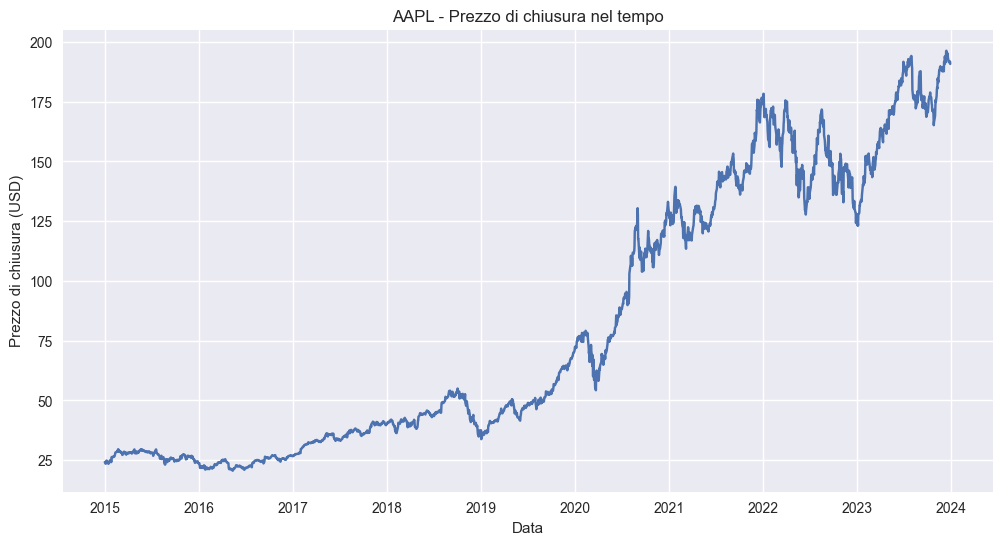

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"])
plt.title("AAPL - Prezzo di chiusura nel tempo")
plt.xlabel("Data")
plt.ylabel("Prezzo di chiusura (USD)")
plt.grid(True)
plt.show()


In [20]:
df.to_csv("../data/raw/AAPL.csv")


In [21]:
df["Return"] = df["Close"].pct_change()

In [22]:
df[["Close", "Return"]].head(10)


,Close,Return
Date,,
2015-01-02,24.237551,NaN
2015-01-05,23.554739,-0.028172
2015-01-06,23.556955,0.000094
2015-01-07,23.887274,0.014022
2015-01-08,24.805079,0.038422
2015-01-09,24.831684,0.001073
2015-01-12,24.219809,-0.024641
2015-01-13,24.434853,0.008879
2015-01-14,24.341747,-0.003810


In [23]:
df = df.dropna()

In [24]:
df[["Close", "Return"]].head(10)

,Close,Return
Date,,
2015-01-05,23.554739,-0.028172
2015-01-06,23.556955,0.000094
2015-01-07,23.887274,0.014022
2015-01-08,24.805079,0.038422
2015-01-09,24.831684,0.001073
2015-01-12,24.219809,-0.024641
2015-01-13,24.434853,0.008879
2015-01-14,24.341747,-0.003810
2015-01-15,23.681101,-0.027140


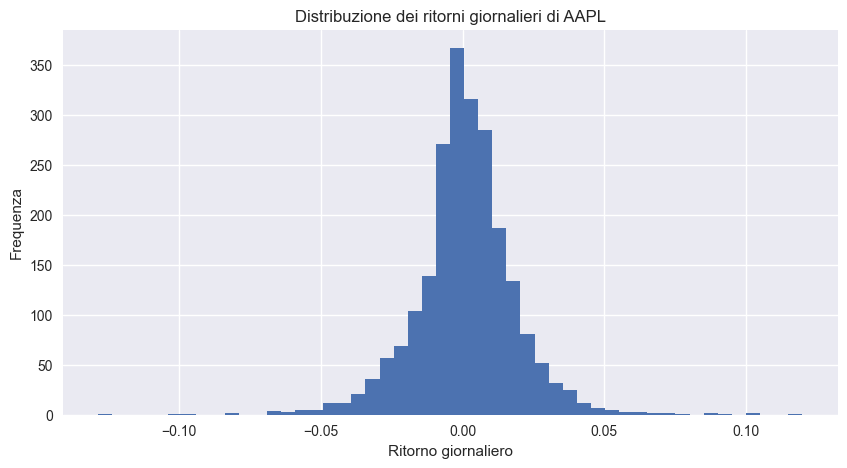

In [25]:
plt.figure(figsize=(10, 5))
plt.hist(df["Return"], bins=50)
plt.title("Distribuzione dei ritorni giornalieri di AAPL")
plt.xlabel("Ritorno giornaliero")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()


In [26]:
df.to_csv("../data/processed/AAPL_with_returns.csv")


In [27]:
df["Target_Return"] = df["Close"].shift(-1) / df["Close"] - 1
df[["Close", "Return", "Target_Return"]].head()


C:\Users\casta\AppData\Local\Temp\ipykernel_20804\2386961879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target_Return"] = df["Close"].shift(-1) / df["Close"] - 1


,Close,Return,Target_Return
Date,,,
2015-01-05,23.554739,-0.028172,0.000094
2015-01-06,23.556955,0.000094,0.014022
2015-01-07,23.887274,0.014022,0.038422
2015-01-08,24.805079,0.038422,0.001073
2015-01-09,24.831684,0.001073,-0.024641


In [28]:
df.loc[:, "Target_Return"] = df["Close"].shift(-1) / df["Close"] - 1


In [29]:
df[["Return", "Target_Return"]].head(10)

,Return,Target_Return
Date,,
2015-01-05,-0.028172,0.000094
2015-01-06,0.000094,0.014022
2015-01-07,0.014022,0.038422
2015-01-08,0.038422,0.001073
2015-01-09,0.001073,-0.024641
2015-01-12,-0.024641,0.008879
2015-01-13,0.008879,-0.003810
2015-01-14,-0.003810,-0.027140
2015-01-15,-0.027140,-0.007770


In [30]:
df.loc[:, "Target_Class"] = (df["Target_Return"] > 0).astype(int)
df[["Target_Return", "Target_Class"]].head()


C:\Users\casta\AppData\Local\Temp\ipykernel_20804\453681671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Target_Class"] = (df["Target_Return"] > 0).astype(int)


,Target_Return,Target_Class
Date,,
2015-01-05,0.000094,1
2015-01-06,0.014022,1
2015-01-07,0.038422,1
2015-01-08,0.001073,1
2015-01-09,-0.024641,0


In [31]:
df.loc[:, "Target_Class"] = (df["Target_Return"] > 0).astype(int)

In [32]:
df.head


<bound method NDFrame.head of                  Close        High         Low        Open     Volume  \
Date                                                                    
2015-01-05   23.554739   24.086799   23.368519   24.006990  257142000   
2015-01-06   23.556955   23.816334   23.195597   23.619029  263188400   
2015-01-07   23.887274   23.987034   23.654497   23.765343  160423600   
2015-01-08   24.805079   24.862719   24.097882   24.215380  237458000   
2015-01-09   24.831684   25.106581   24.432638   24.978000  214798000   
...                ...         ...         ...         ...        ...   
2023-12-22  191.788788  193.581852  191.164677  193.353993   37149600   
2023-12-26  191.243912  192.076049  191.025969  191.798670   28919300   
2023-12-27  191.342972  191.689703  189.302247  190.689158   48087700   
2023-12-28  191.768921  192.838819  191.362753  192.323679   34049900   
2023-12-29  190.728760  192.581260  189.936241  192.085938   42672100   

              Return

In [33]:
df = df.dropna(subset=["Target_Return"])

df.tail()

,Close,High,Low,Open,Volume,Return,Target_Return,Target_Class
Date,,,,,,,,
2023-12-21,192.858658,195.236214,191.689705,194.265386,46482500,-0.000770,-0.005547,0
2023-12-22,191.788788,193.581852,191.164677,193.353993,37149600,-0.005547,-0.002841,0
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,0.000518,1
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,0.000518,0.002226,1
2023-12-28,191.768921,192.838819,191.362753,192.323679,34049900,0.002226,-0.005424,0


In [34]:
df.to_csv("../data/processed/AAPL_supervised.csv")


In [35]:
split_date = "2022-01-01"

train = df[df.index < split_date]
test  = df[df.index >= split_date]

len(train), len(test)


(1762, 500)

In [36]:
features = ["Close", "Return"]

X_train = train[features]
X_test = test[features]

y_train = train["Target_Return"]
y_test = test["Target_Return"]

X_train.shape, X_test.shape


((1762, 2), (500, 2))

In [1]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)


NameError: name 'X_train' is not defined

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")


In [3]:
df = pd.read_csv("../data/processed/AAPL_supervised.csv", index_col=0, parse_dates=True)


In [4]:
df = df.dropna(subset=["Target_Return"])


In [5]:
split_date = "2022-01-01"
train = df[df.index < split_date]
test = df[df.index >= split_date]


In [6]:
features = ["Close", "Return"]

X_train = train[features]
X_test = test[features]

y_train = train["Target_Return"]
y_test = test["Target_Return"]


In [7]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [10]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

mae_knn, rmse_knn


(0.016228276547082452, np.float64(0.020243021625063702))

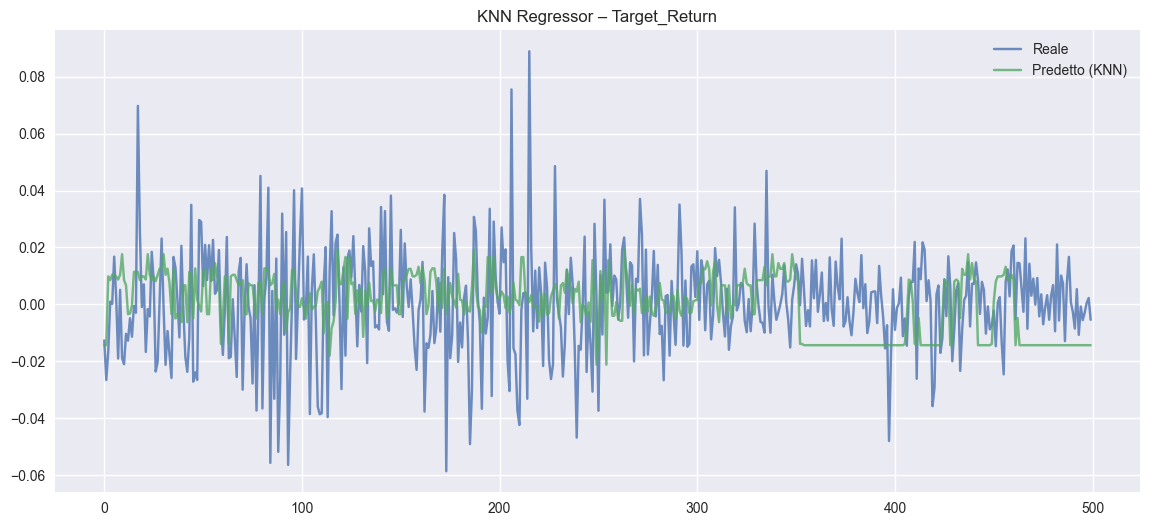

In [11]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Reale", alpha=0.8)
plt.plot(y_pred_knn, label="Predetto (KNN)", alpha=0.8)
plt.title("KNN Regressor – Target_Return")
plt.legend()
plt.show()


In [12]:
## Multi-asset dataset (AAPL, MSFT, GOOG, AMZN, META)
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "META"]
tickers


['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META']

In [1]:
## Multi-asset dataset (AAPL, MSFT, GOOG, AMZN, META)


In [2]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "META"]
tickers


['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META']

In [3]:
all_dfs = []

for t in tickers:
    print(f"Scarico dati per {t}...")
    temp = yf.download(t, start="2015-01-01", end="2025-12-31")
    
    # Prendiamo solo il livello "Price" se esiste, così otteniamo Close, High, Low, Open, Volume
    if isinstance(temp.columns, pd.MultiIndex):
        # Alcune versioni di yfinance mettono "Price" come primo livello
        if "Price" in temp.columns.levels[0]:
            temp = temp["Price"]
    
    # Rinominiamo le colonne in modo consistente
    temp.columns = ["Close", "High", "Low", "Open", "Volume"]
    
    # Calcoliamo il Return giornaliero
    temp["Return"] = temp["Close"].pct_change()
    
    # Calcoliamo il Target_Return (ritorno del giorno successivo)
    temp["Target_Return"] = temp["Close"].shift(-1) / temp["Close"] - 1
    
    # Calcoliamo la classe UP/DOWN
    temp["Target_Class"] = (temp["Target_Return"] > 0).astype(int)
    
    # Aggiungiamo la colonna Ticker per sapere a chi appartiene ogni riga
    temp["Ticker"] = t
    
    # Rimuoviamo le righe con NaN (inizio serie + ultima per shift)
    temp = temp.dropna(subset=["Return", "Target_Return"])
    
    all_dfs.append(temp)

# Uniamo tutti i DataFrame in uno solo
df_all = pd.concat(all_dfs)

df_all.head()


Scarico dati per AAPL...


C:\Users\casta\AppData\Local\Temp\ipykernel_18788\3483332231.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(t, start="2015-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\casta\AppData\Local\Temp\ipykernel_18788\3483332231.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(t, start="2015-01-01", end="2025-12-31")


Scarico dati per MSFT...


[*********************100%***********************]  1 of 1 completed
C:\Users\casta\AppData\Local\Temp\ipykernel_18788\3483332231.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(t, start="2015-01-01", end="2025-12-31")


Scarico dati per GOOG...


[*********************100%***********************]  1 of 1 completed
C:\Users\casta\AppData\Local\Temp\ipykernel_18788\3483332231.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(t, start="2015-01-01", end="2025-12-31")


Scarico dati per AMZN...


[*********************100%***********************]  1 of 1 completed
C:\Users\casta\AppData\Local\Temp\ipykernel_18788\3483332231.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(t, start="2015-01-01", end="2025-12-31")


Scarico dati per META...


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,Return,Target_Return,Target_Class,Ticker
Date,,,,,,,,,
2015-01-05,23.554737,24.086797,23.368517,24.006988,257142000,-0.028172,0.000094,1,AAPL
2015-01-06,23.556959,23.816338,23.195601,23.619033,263188400,0.000094,0.014022,1,AAPL
2015-01-07,23.887274,23.987034,23.654497,23.765343,160423600,0.014022,0.038422,1,AAPL
2015-01-08,24.805082,24.862723,24.097885,24.215383,237458000,0.038422,0.001072,1,AAPL
2015-01-09,24.831680,25.106577,24.432635,24.977996,214798000,0.001072,-0.024641,0,AAPL


In [4]:
df_all["Ticker"].value_counts()


Ticker
AAPL    2754
MSFT    2754
GOOG    2754
AMZN    2754
META    2754
Name: count, dtype: int64

In [5]:
df_all.to_csv("../data/processed/multi_assets_supervised.csv")


In [6]:
split_date = "2022-01-01"

train_all = df_all[df_all.index < split_date]
test_all  = df_all[df_all.index >= split_date]

len(train_all), len(test_all)


(8810, 4960)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model_knn_all = KNeighborsRegressor(n_neighbors=5)
model_knn_all.fit(X_train_all, y_train_all)

y_pred_knn_all = model_knn_all.predict(X_test_all)

mae_knn_all = mean_absolute_error(y_test_all, y_pred_knn_all)
rmse_knn_all = np.sqrt(mean_squared_error(y_test_all, y_pred_knn_all))

mae_knn_all, rmse_knn_all


NameError: name 'X_train_all' is not defined

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")


In [9]:
df_all = pd.read_csv(
    "../data/processed/multi_assets_supervised.csv",
    index_col=0,
    parse_dates=True
)


In [10]:
split_date = "2022-01-01"

train_all = df_all[df_all.index < split_date]
test_all  = df_all[df_all.index >= split_date]


In [11]:
features = ["Close", "Return"]

X_train_all = train_all[features]
X_test_all  = test_all[features]

y_train_all = train_all["Target_Return"]
y_test_all  = test_all["Target_Return"]


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_knn_all = KNeighborsRegressor(n_neighbors=5)
model_knn_all.fit(X_train_all, y_train_all)

y_pred_knn_all = model_knn_all.predict(X_test_all)

mae_knn_all = mean_absolute_error(y_test_all, y_pred_knn_all)
rmse_knn_all = np.sqrt(mean_squared_error(y_test_all, y_pred_knn_all))

mae_knn_all, rmse_knn_all


(0.016650077725232786, np.float64(0.023554355383909438))